In [1]:
import re
import pprint
import nltk
import datetime
import os
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

## The User Class
This is the class where all The users object will be difined.

**Attributes Are:** 

- username => This is the username of the user instance :string.
- messages => This are The messages sent by the particuar user :list.

**Methods:**

- word_counter => This returns The top N words used by The user if N is'nt passed i.e N is None it returns The First Word

In [2]:
class User:
    def __init__(self,username):
        self.username = username
        self.messages=[]
        
    #This Returns the most used words count to N if N isn't specified it will return the first most used word
    def word_counter(self,N=None):
        texts=[]
        for i in range(len(self.messages)):
            temp_words=self.messages[i][1].split(' ')
            for word in temp_words:
                if (word != '<Media') and (word != 'omitted>'):
                    texts.append(word.lower())
                else:
                    pass
        texts=[word for word in texts if not word in set(stopwords.words('english')) and word != '']
        text_count = Counter(texts)
        if N == None:
            freq=text_count.most_common(1)
            return freq
        else:
            freq=text_count.most_common(N)
            return freq
        
        
    def __str__(self):
        return str(self.username)

## The Preprocessing Stage

Change The PATH variable to The path of your chat file.

In [24]:
messages=[]
user_count =[]
info = re.compile(r'(\d+/\d+/\d+), \d+:\d+ - (.+): (.+)')
# Input your file path here
PATH = r"C:\Users\free\Documents\projects\chats\WhatsApp Chat with 3⃣0⃣0⃣ LEVEL SICT FUTMINNA.txt"
group_name = os.path.basename(PATH)[:-4].replace('WhatsApp Chat with ','')
with open(PATH,'r',encoding='utf-8') as chat:
    msgs = chat.readlines()
    for i in range(1,len(msgs)):
        line = msgs[i].replace('\n',' ')
        matches=info.match(str(line))
        if matches:
            date = matches.group(1)
            username = matches.group(2)
            msg = matches.group(3)
            if ':' not in username:
                user_count.append(username)
                messages.append([username,date,msg])
            elif username[:username.index(':')] not in user_count:
                user_count.append(username[:username.index(':')])
                messages.append([username,date,msg])
            else:
                pass
            
        elif not (re.match(r'\d+/\d+/\d+, \d+:\d+ - \+\d{3} \d{3} \d{3} \d{4} .+',line)) and  not (re.match(r'\d+/\d+/\d+, \d+:\d+ - .+',line)):
            messages[len(messages)-1][2] = messages[len(messages)-1][2] + line
        else:
            pass

users = {}
dates = []
for i in range(len(messages)):
    if messages[i][0] not in users.keys():
        users[messages[i][0]] = User(messages[i][0])
    else:
        users[messages[i][0]].messages.append([messages[i][1],messages[i][2]])

## Top 10 Most Used Word by a Particular User

Replace The user variable to the name of the user you want to use.


**Note:**
> The name you want to get most be in your contact list the way you saved it.
> And if its not in your contact list pass in the mobile number as a string

In [21]:
user = 'Elvis'
freq=users[user].word_counter(10)
print(f'Top ten words by {user}: \n')
for i in range(len(freq)):
    print(f'{freq[i][0]:<10}({freq[i][1]})')
    print()

Top ten words by Elvis: 

u         (59)

message   (22)

deleted   (22)

dey       (20)

lol       (18)

ok        (17)

na        (16)

ur        (12)

go        (11)

know      (11)



## Top words Used in Group

In [22]:
#*Be patient while executing this cell its slow because is Highly Computational*
words = []
for n in range(len(messages)):
    temp_words = messages[n][2].split(' ')
    for word in temp_words:
        if (word != '<Media') and (word != 'omitted>'):
            words.append(word.lower())
        else:
            pass
words = [word for word in words if not word in set(stopwords.words('english')) and word != '']
word_count = Counter(words)
top_words=word_count.most_common(10)
print('Top 10 used words in group are: \n')
for i in range(len(top_words)):
    print(f'{top_words[i][0]:<10}({top_words[i][1]})')
    print()

Top 10 used words in group are: 

u         (392)

please    (288)

one       (258)

make      (196)

message   (194)

go        (191)

pls       (190)

us        (187)

sict      (180)

na        (177)



## Chart of The Top 5 Active Members

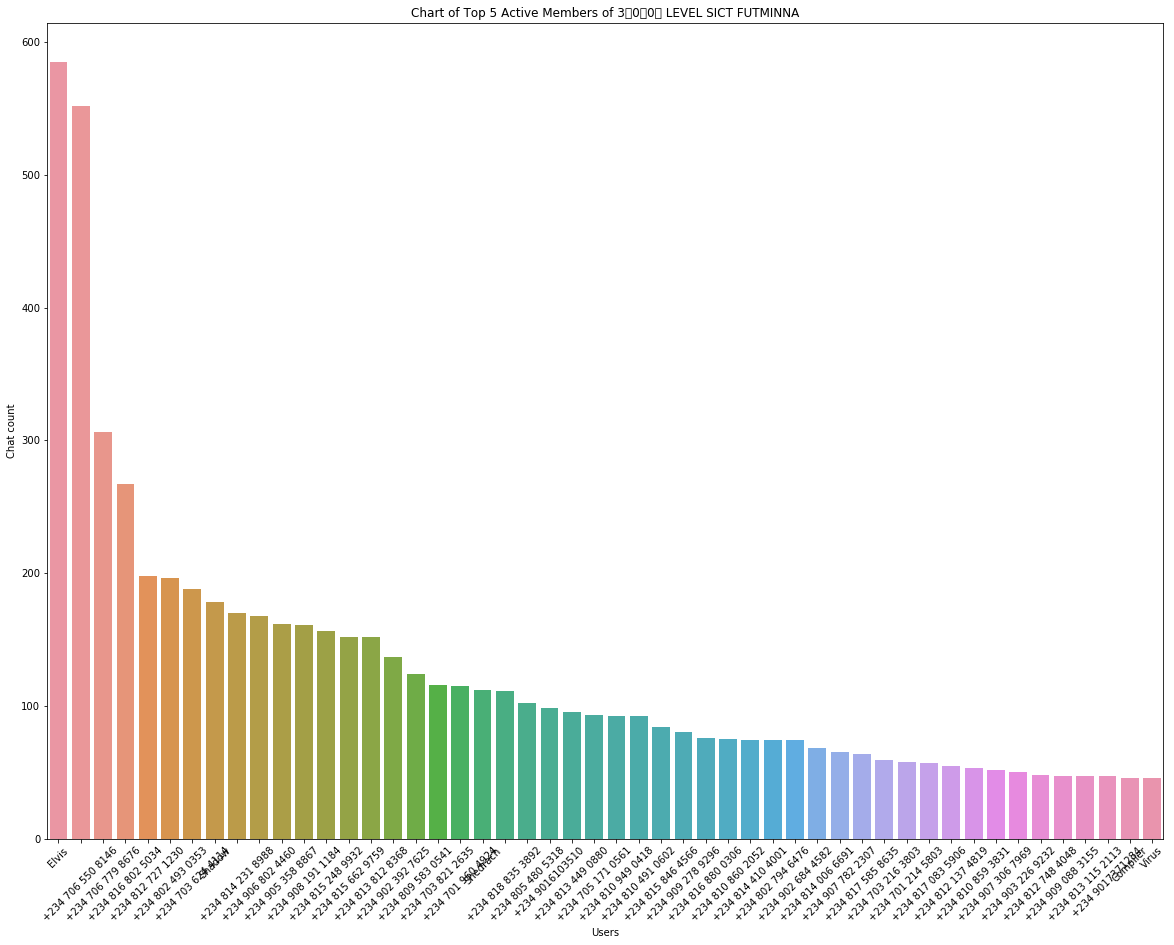

In [28]:
top_users = []
user_rate = Counter(user_count).most_common(50)
user_rate = dict(user_rate)
counts = list(user_rate.values())
usernames = list(user_rate.keys())
fig = plt.figure(figsize=(20,15))
sns.barplot(x=usernames, y=counts)
plt.xticks(rotation=45)
plt.title(f'Chart of Top 5 Active Members of {group_name}')
plt.xlabel('Users')
plt.ylabel('Chat count')
plt.savefig(f'C:\\Users\\free\\Documents\\projects\\chats\\media\\active members of {group_name}.png',dpi=128)
plt.show()

## Chart of the chat Rate with time

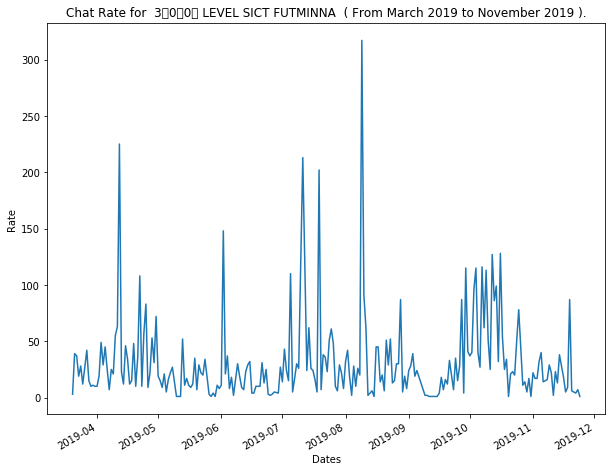

In [7]:
chat_dates = []
for i in range(len(messages)):
    chat_dates.append(messages[i][1])

chat_dates_count = Counter(chat_dates)
dates = [datetime.datetime.strptime(date,"%m/%d/%y") for date in chat_dates_count.keys()]
count = [rate for rate in chat_dates_count.values()]

fig = plt.figure(figsize=(10,8))
plt.plot(dates,count)
plt.title('Chat Rate for  {}  ( From {} to {} ).'.format(group_name,min(dates).strftime('%B %Y'),max(dates).strftime('%B %Y')))
plt.xlabel('Dates')
plt.ylabel('Rate')
fig.autofmt_xdate()
plt.savefig(f'C:\\Users\\free\\Documents\\projects\\chats\\media\\{group_name}_chat_rate.png',dpi=128)
plt.show()